In [3]:
#Sept 2021: END SEMESTER ASSESSMENT (ESA)
#M.TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

#	UE20CS908 - MACHINE LEARNING - II

About the Dataset:
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.
Develop a machine learning model to predict whether customer left the bank using the features provided in the dataset. Prior to building the ML model EDA needs to carried out to understand and clean the data.         


In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### 2(i).  Read the dataset and print the following (5 marks)
     *Shape of the data
     * Number of numerical and categorical variable
     * Descriptive stats of numerical data
     * Descriptive stats of categorical data


In [6]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

In [12]:
numeric_df = data.select_dtypes(include=np.number)
numeric_df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

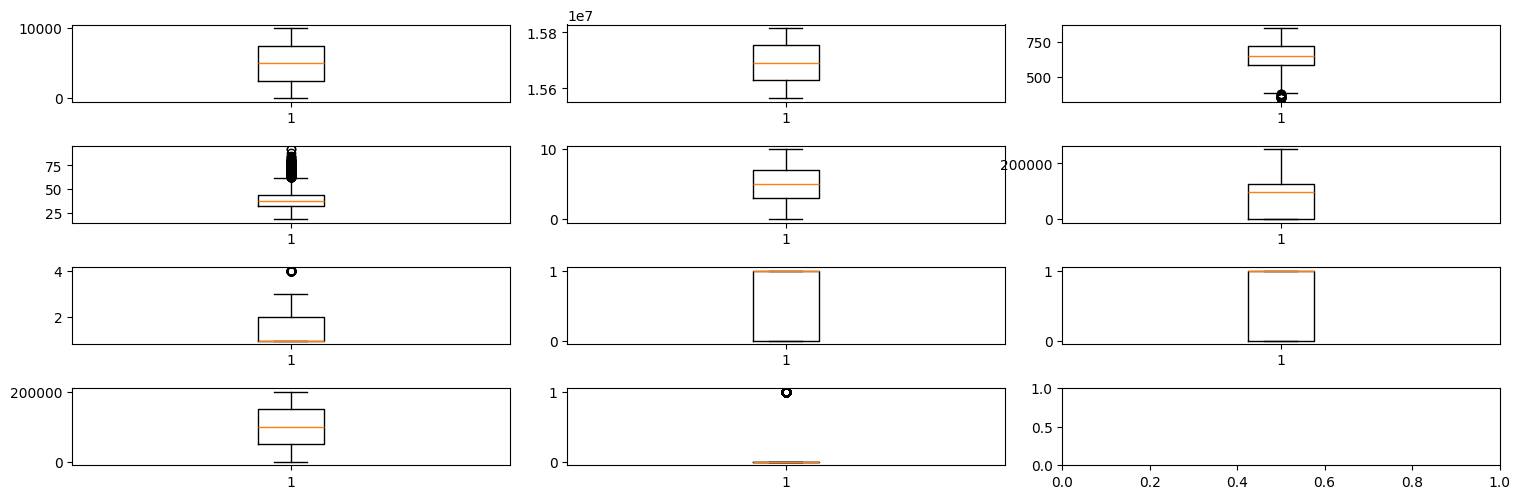

In [25]:
fig, axs = plt.subplots(4,3, figsize=(15,5))
idx = 0;
plt.tight_layout()
for i in range(4):
    for j in range(3):
        if(idx <11):
            axs[i][j].boxplot(x=numeric_df.iloc[:,idx])
        idx+= 1

### 2 (ii).Perform   appropriate encoding on ‘Geography’ and ‘Gender’ column. (5 Marks)

In [26]:
cat_df = data.select_dtypes(include="object")
cat_df.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [30]:
cat_df.drop(labels=['Surname'], inplace=True, axis=1)

In [31]:
cat_encoded_df = pd.get_dummies(data=cat_df, drop_first=True, dtype=np.int16)
cat_encoded_df.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [32]:
merged_df = pd.concat([numeric_df, cat_encoded_df], axis=1)

### 2 (iii). Examine outliers by plotting and also by using z score. Examine is the Target variable evenly balanced.(5 Marks)

In [33]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

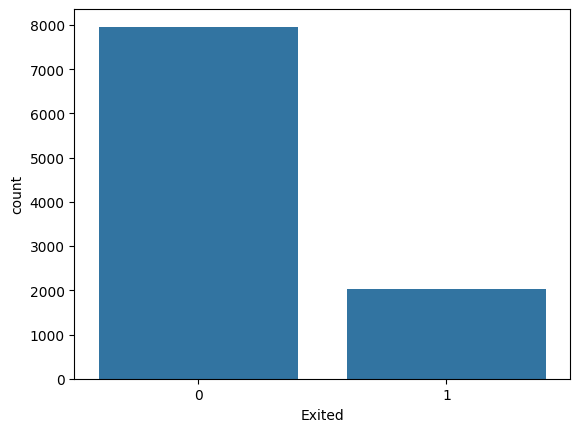

In [35]:
sns.countplot(x=merged_df.Exited)

In [ ]:
#No, target is not evenly balanced.

### 2(iv). Check for defects in the data like missing values, removing unnecessary features/columns. Perform necessary actions to ‘fix’ these defects.(6 marks)

In [ ]:
#No Missing values

### 2(v). Examine the correlation and summarize the relationship between variables. Use appropriate plots to justify the same.(6 Marks)    

<Axes: >

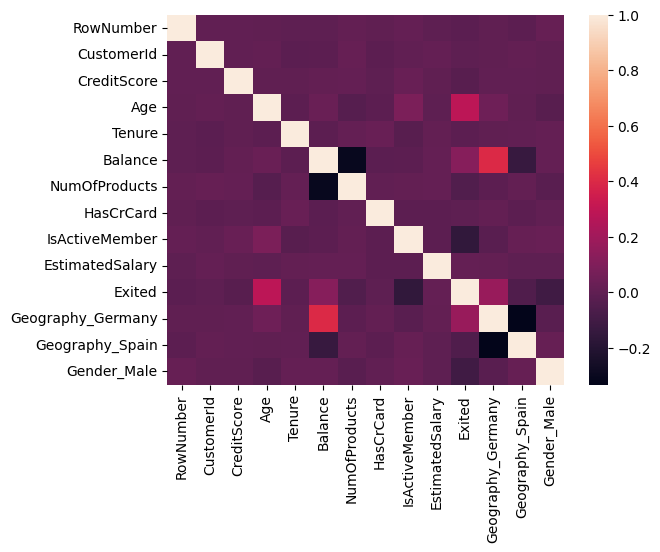

In [36]:
sns.heatmap(merged_df.corr())

<Axes: xlabel='Age', ylabel='count'>

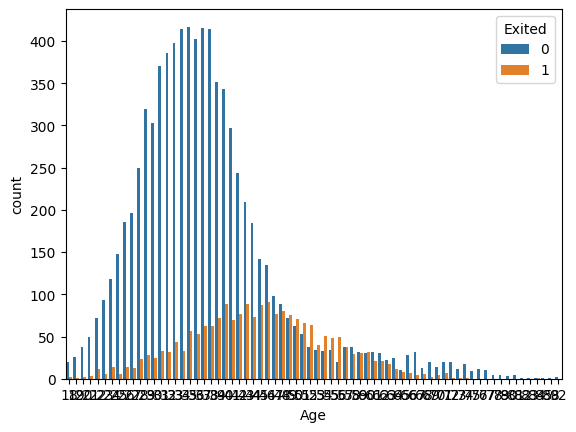

In [44]:
sns.countplot(x=merged_df.Age, hue=merged_df.Exited)

### 2(vi)Split dataset into train and test (70:30).\(3 marks)           

In [82]:
X = merged_df.drop(labels=['Exited'], axis=1)
y = merged_df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

(7000, 13) (3000, 13) (3000,) (7000,)


### Section C (40 marks)

### 3 (i)Fit a base model and explain the reason of selecting that model. Please write your key observations. Calculate Cohen Kappa value with the best model achieved.(15 Marks)



In [83]:
#RandomForest

In [196]:
base_model = RandomForestClassifier(n_estimators=20)

In [197]:
base_model = base_model.fit(X_train, y_train)

In [198]:
y_train_predict = base_model.predict(X_train)

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report, f1_score, precision_score, recall_score

In [200]:
accuracy_score(y_train, y_train_predict)

0.994

In [201]:
accuracy_score(y_test, base_model.predict(X_test))

0.864

In [202]:
#Accuracy is 79%

In [203]:
cohen_kappa_score(y_test, base_model.predict(X_test))

0.49011217532142926

In [204]:
#Very low score.

In [205]:
accuracy_score(y_test, base_model.predict(X_test))

0.864

### 3 (ii) Print the classification report of the model builded in the above step and check that increasing or reducing the probability threshold will lead to model’s better performance. (15 Marks)


In [206]:
def get_model_report(threshold = 0.5):
    pred_prob = base_model.predict_proba(X_test)
    pred = [1 if x[1] > threshold else 0 for x in pred_prob]
    return accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred), cohen_kappa_score(y_test, pred)


In [207]:
accuracy_list = list()
precision_list = list()
recall_list = list()
cohen_score_list = list()
threshold = list()
for i in  [0.5, 0.6, 0.7, 0.8, 0.9,0.94, 0.96]:
    accuracy, precision, recall, cohen = get_model_report(i)
    accuracy_list.append(accuracy)
    threshold.append(i)
    precision_list.append(precision)
    recall_list.append(recall)
    cohen_score_list.append(cohen)
pd.DataFrame({"Threshold":threshold, "Accuracy":accuracy_list, "Precision":precision_list, "CohenScore":cohen_score_list, "Recall":recall_list})

,Threshold,Accuracy,Precision,CohenScore,Recall
0,0.50,0.864000,0.748588,0.490112,0.453767
1,0.60,0.859667,0.822134,0.429924,0.356164
2,0.70,0.845000,0.860606,0.320930,0.243151
3,0.80,0.830000,0.920455,0.200299,0.138699
4,0.90,0.815667,0.969697,0.084667,0.054795
5,0.94,0.815667,0.969697,0.084667,0.054795
6,0.96,0.808000,0.900000,0.023905,0.015411


### 3 Summarize as follows (10 Marks)
- 1.With respect to features
- 2.Evaluation metrics
- 3.Overall Results and Observations


In [208]:
#With increase in threshold, the precision increases, that is, True positive increases. 

In [209]:
#CohenScore decreases as a result it is indicating, it is by chance we are getting 80% accurate results.